From Kaggle Kernerl: https://www.kaggle.com/manvindra/py-data-processing-visuals/notebook

In [1]:
import pandas as pd
import numpy as np
import datetime
import calendar

### Retrieve the data 

In [2]:
#Load all Files (hey must be in input directory in a brother directory of the notebook)
data_load = {
    'air_reserve': pd.read_csv('../input/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime']), 
    'hpg_reserve': pd.read_csv('../input/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime']), 
    'air_store': pd.read_csv('../input/air_store_info.csv'),
    'hpg_store': pd.read_csv('../input/hpg_store_info.csv'),
    'air_visit': pd.read_csv('../input/air_visit_data.csv',parse_dates=['visit_date']),
    'store_id': pd.read_csv('../input/store_id_relation.csv'),
    'sample_sub': pd.read_csv('../input/sample_submission.csv'),
    'holiday_dates': pd.read_csv('../input/date_info.csv',parse_dates=['calendar_date']).rename(columns={'calendar_date':'visit_date'})
    }

In [3]:
# Air Reserve: reservations made in the air system
data_load['air_reserve'].head()
# std	4.92 # min	1.00 # 25%	2.00 # 50%	3.00 # 75%	5.00 # max	100.00

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [4]:
# Hpg Reserve: reservations made in the air system
data_load['hpg_reserve'].describe(include = 'all')


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
count,2000320,2000320,2000320,2.000320e+06
unique,13325,9847,11450,NaN
top,hpg_2afd5b187409eeb4,2016-12-16 19:00:00,2016-12-12 21:00:00,NaN
freq,1155,10528,907,NaN
first,NaN,2016-01-01 11:00:00,2016-01-01 00:00:00,NaN
last,NaN,2017-05-31 23:00:00,2017-04-22 23:00:00,NaN
mean,NaN,NaN,NaN,5.073785e+00
std,NaN,NaN,NaN,5.416172e+00
min,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,2.000000e+00


In [5]:
# air_store: information about select air restaurants (string columns)
data_load['air_store'].describe(include = ['O'])
# This contains also the longitude/latitude of the area

,air_store_id,air_genre_name,air_area_name
count,829,829,829
unique,829,14,103
top,air_950381108f839348,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō
freq,1,197,64


In [6]:
# air_store: information about select air restaurants (string columns)
data_load['hpg_store'].describe(include = ['O'])
# This contains also the longitude/latitude of the area

,hpg_store_id,hpg_genre_name,hpg_area_name
count,4690,4690,4690
unique,4690,34,119
top,hpg_a76c171d2ea9fb97,Japanese style,Tōkyō-to Shinjuku-ku None
freq,1,1750,257


In [7]:
#holiday_dates: basic information about the calendar dates in the dataset.
data_load['holiday_dates'].head(5)

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [8]:
#air_visit : historical visit data for the air restaurants.
data_load['air_visit'].head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [9]:
#air_visit : historical visit data for the air restaurants.
data_load['air_visit'].describe(include = 'all')

,air_store_id,visit_date,visitors
count,252108,252108,252108.000000
unique,829,478,NaN
top,air_5c817ef28f236bdf,2017-03-17 00:00:00,NaN
freq,477,799,NaN
first,NaN,2016-01-01 00:00:00,NaN
last,NaN,2017-04-22 00:00:00,NaN
mean,NaN,NaN,20.973761
std,NaN,NaN,16.757007
min,NaN,NaN,1.000000
25%,NaN,NaN,9.000000


In [10]:
#sample_sub : submission data
data_load['sample_sub'].describe(include = 'all')
# data_load['sample_sub'].head(40)
# We need to predict a time series of 39 steps

,id,visitors
count,32019,32019.0
unique,32019,NaN
top,air_452100f5305dde64_2017-04-26,NaN
freq,1,NaN
mean,NaN,0.0
std,NaN,0.0
min,NaN,0.0
25%,NaN,0.0
50%,NaN,0.0
75%,NaN,0.0


In [11]:
data_load['sample_sub'].describe()

,visitors
count,32019.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


This is crazy: we need to make predictions on all restaurant of Air data set, but we have good reservations data only on HPG

### Data visualization

#### Holidays

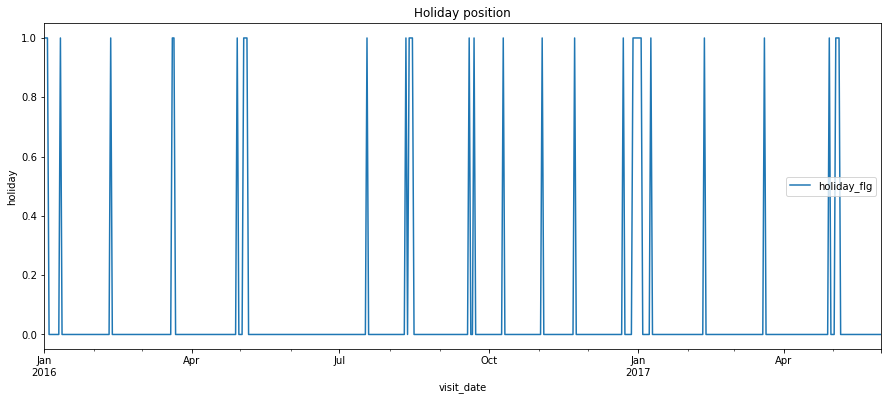

In [34]:
plt7 = data_load['holiday_dates'][['visit_date','holiday_flg']]
plt7 = plt7.set_index('visit_date')
plt7.plot(figsize=(15, 6))
plt.ylabel("holiday")
plt.title("Holiday position")

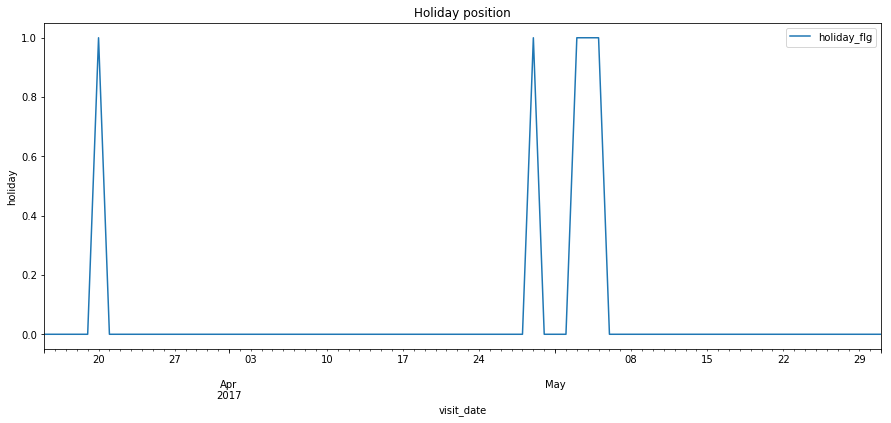

In [87]:
threshold_date = datetime.date(2017, 3, 15)
evaluation_end_date = datetime.date(2017,5, 31)

plt7 = data_load['holiday_dates']
plt7 = plt7[(plt7[('visit_date')] >= threshold_date) & (plt7['visit_date'] <= evaluation_end_date)]

plt7 = plt7[['visit_date','holiday_flg']]
plt7 = plt7.set_index('visit_date')
plt7.plot(figsize=(15, 6))
plt.ylabel("holiday")
plt.title("Holiday position")

#### Air data

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline


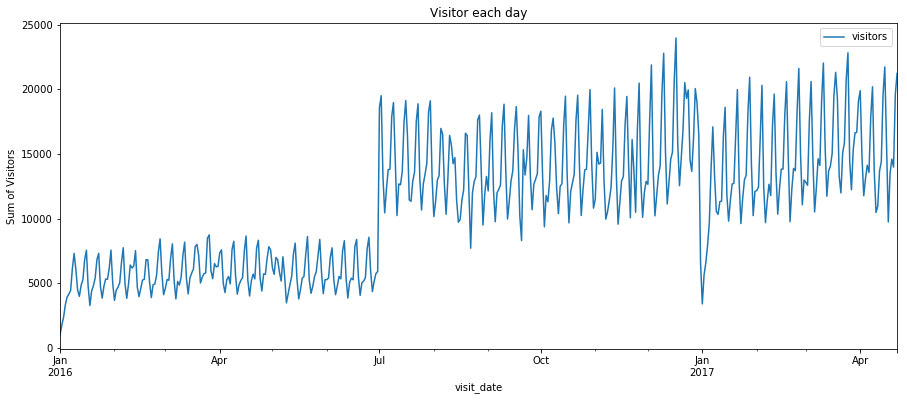

In [62]:
#Visitor each day
plt1 = data_load['air_visit'].groupby(['visit_date'], as_index=False).agg({'visitors': np.sum})
plt1=plt1.set_index('visit_date')
plt1.plot(figsize=(15, 6))
plt.ylabel("Sum of Visitors")
plt.title("Visitor each day")

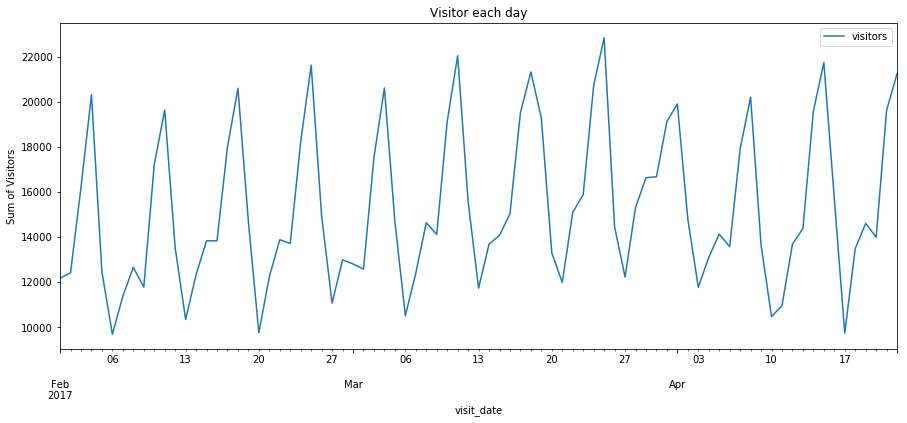

In [64]:
threshold_date = datetime.date(2017, 2, 1)
evaluation_end_date = datetime.date(2017,4, 22)

#Visitor each day
plt1 = data_load['air_visit']
plt1 = plt1[(plt1[('visit_date')] >= threshold_date) & (plt1['visit_date'] <= evaluation_end_date)]
plt1 = plt1.groupby(['visit_date'], as_index=False).agg({'visitors': np.sum})
plt1=plt1.set_index('visit_date')
plt1.plot(figsize=(15, 6))
plt.ylabel("Sum of Visitors")
plt.title("Visitor each day")

#### Restaurants with most visits

In [58]:
plt2=data_load['air_visit'].groupby(['air_store_id']).sum().reset_index().sort_values(['visitors'], ascending = False)
plt2[0:50]

,air_store_id,visitors
172,air_399904bdb7685ca0,18717
791,air_f26f36ec4dc5adb0,18577
743,air_e55abd740f93ecc4,18101
496,air_99157b6163835eec,18097
274,air_5c817ef28f236bdf,18009
705,air_d97dabf7aae60da5,17971
156,air_3525f11ef0bf0c35,17958
325,air_681f96e6a6595f82,17559
690,air_d34c0861a2be94cb,17467
21,air_082908692355165e,17408


In [57]:
plt2=data_load['air_visit'].groupby(['air_store_id']).agg({'visitors': np.mean}).reset_index().sort_values(['visitors'], ascending = False)
plt2[0:10]

,air_store_id,visitors
71,air_1c0b150f9e696a5f,115.470588
453,air_900d755ebd2f7bbd,82.200000
510,air_9c6787aa03a45586,76.457143
103,air_258dc112912fc458,63.550000
721,air_df554c4527a1cfe6,63.000000
379,air_789103bf53b8096b,55.243902
677,air_cf5ab75a0afb8af9,53.830189
241,air_4feeb8600f131e43,53.140351
706,air_d98380a4aeb0290b,50.845455
496,air_99157b6163835eec,47.875661


#### Restaurant visits curve

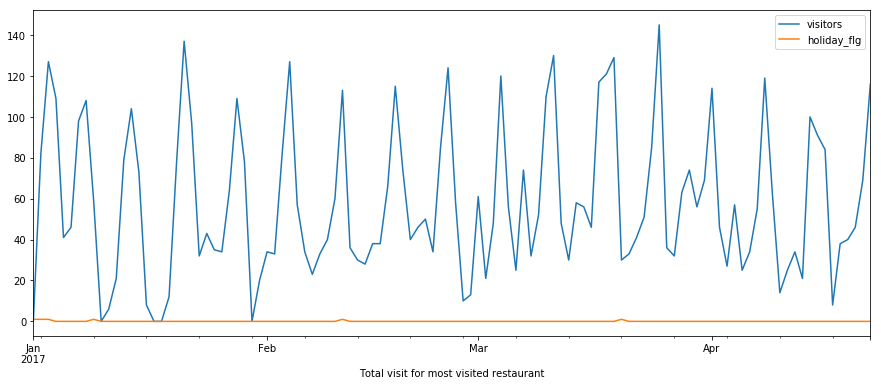

In [105]:
threshold_date = datetime.date(2017, 1, 1)
evaluation_end_date = datetime.date(2017,4, 22)

airR =data_load['air_visit'].copy()
airR = airR[airR['air_store_id']=='air_df554c4527a1cfe6']
airR = airR.merge(data_load['holiday_dates'], 
                 how = 'outer',
                 on='visit_date').sort_values('visit_date').fillna(0)
airR = airR[(airR[('visit_date')] >= threshold_date) & (airR['visit_date'] <= evaluation_end_date)]


airR=airR.set_index('visit_date')

ax = airR.plot(figsize=(15, 6))
ax.set_xlabel('Total visit for most visited restaurant')

In [70]:
airR

,air_store_id,visitors,dow,Month
visit_date,,,,
2017-03-02,air_900d755ebd2f7bbd,4,Thursday,March
2017-04-01,air_900d755ebd2f7bbd,47,Saturday,April
2017-04-02,air_900d755ebd2f7bbd,54,Sunday,April
2017-04-04,air_900d755ebd2f7bbd,79,Tuesday,April
2017-04-05,air_900d755ebd2f7bbd,82,Wednesday,April
2017-04-06,air_900d755ebd2f7bbd,89,Thursday,April
2017-04-07,air_900d755ebd2f7bbd,84,Friday,April
2017-04-08,air_900d755ebd2f7bbd,67,Saturday,April
2017-04-09,air_900d755ebd2f7bbd,50,Sunday,April


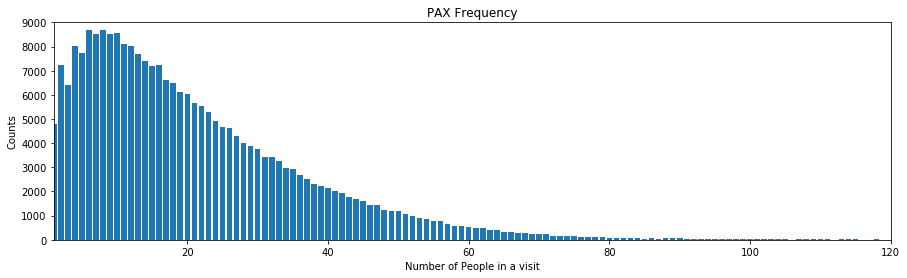

In [36]:
# Pax Frequency: Count of visit with 'x' visitor
plt2=data_load['air_visit']['visitors'].value_counts().reset_index().sort_index()
fig,ax = plt.subplots()
ax.bar(plt2['index'] ,plt2['visitors'])
plt.axis([1, 120, 0, 9000])
fig.set_size_inches(15,4, forward=True)
ax.set_title("PAX Frequency")
ax.set_ylabel('Counts')
ax.set_xlabel('Number of People in a visit')

In [16]:
#Median number of visitor in day of a week
data_load['air_visit']['dow']=data_load['air_visit']['visit_date'].apply(lambda x: calendar.day_name[x.weekday()])
plt3 = data_load['air_visit'].groupby(['dow'], as_index=False).agg({'visitors': np.median})
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
mapping = {day: i for i, day in enumerate(days)}
key = plt3['dow'].map(mapping)
plt3 = plt3.iloc[key.argsort()].set_index('dow').reset_index()

#Median number of visitor in Month of a Year
data_load['air_visit']['Month']=data_load['air_visit']['visit_date'].apply(lambda x: calendar.month_name[x.month])
plt4 = data_load['air_visit'].groupby(['Month'], as_index=False).agg({'visitors': np.median})
Months = ['January','February','March','April','May','June','July','August','September','October','November','December']
mapping = {Month: i for i, Month in enumerate(Months)}
key = plt4['Month'].map(mapping)
plt4 = plt4.iloc[key.argsort()].set_index('Month').reset_index()

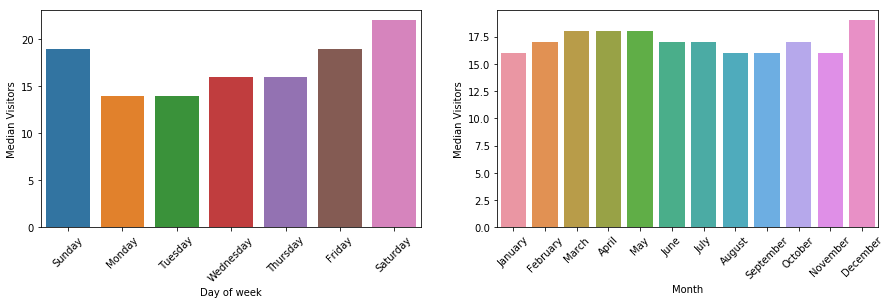

In [52]:
#plot
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,4, forward=True)

sns.barplot(x="dow",y="visitors",data=plt3,ax=ax[0])
sns.barplot(x="Month",y="visitors",data=plt4,ax=ax[1])
ax[0].set_xlabel('Day of week')
ax[0].set_ylabel('Median Visitors')
ax[1].set_ylabel('Median Visitors')
for ax in ax:
    for label in ax.get_xticklabels():
        label.set_rotation(45) 

### Air reservation

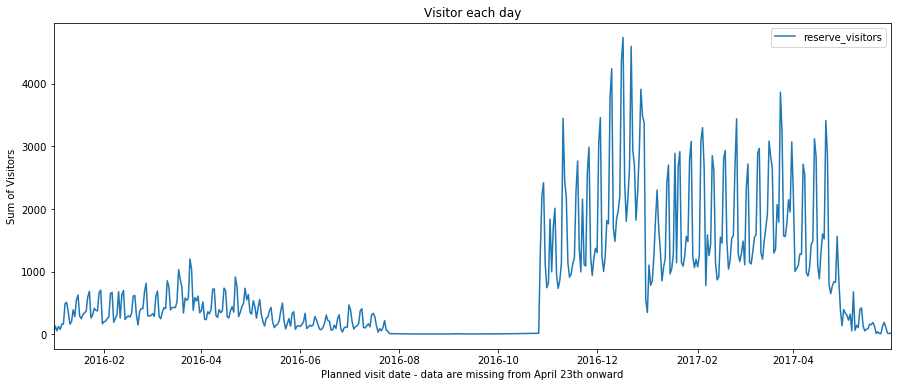

In [84]:
# Compare Reservation data to Visitor data
#Visitor each day
data_load['air_reserve']['visit_date']=data_load['air_reserve']['visit_datetime'].apply(lambda x: x.date())
data_load['air_reserve']['reserve_date']=data_load['air_reserve']['reserve_datetime'].apply(lambda x: x.date())
airR1 = data_load['air_reserve'].groupby(['visit_date'], as_index=False).agg({'reserve_visitors': np.sum})
airR1=airR1.set_index('visit_date')
airR1.plot(figsize=(15, 6))
plt.ylabel("Sum of Visitors")
plt.title("Visitor each day")
plt.xlabel("Planned visit date - data are missing from April 23th onward")

In [70]:
data_load['air_reserve']['visit_hr']=data_load['air_reserve']['visit_datetime'].apply(lambda x: x.time().hour)
data_load['air_reserve']['reserve_hr']=data_load['air_reserve']['reserve_datetime'].apply(lambda x: x.time().hour)
data_load['air_reserve']['diff_hr']=(data_load['air_reserve']['visit_datetime']-data_load['air_reserve']['reserve_datetime']).apply(lambda x : x.total_seconds()/3600)
airR2 = data_load['air_reserve'].groupby(['visit_hr'], as_index=False).agg({'reserve_visitors': np.sum})
airR3 = data_load['air_reserve'].groupby(['diff_hr'], as_index=False).agg({'reserve_visitors': np.sum})

In [ ]:
#plot
fig = plt.figure(figsize=(15, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 2.5]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
sns.barplot(x="visit_hr",y="reserve_visitors",data=airR2,ax=ax0)
sns.barplot(x="diff_hr",y="reserve_visitors",data=airR3[(airR3['diff_hr'] <= 50)],ax=ax1)
ax0.set_xlabel('Planned Visit Hour')
ax0.set_ylabel('Sum of Reserve Visitor')
ax1.set_xlabel('Difference in hours')
ax1.set_ylabel('Sum of Reserve Visitor')
for ax in [ax0,ax1]:
    for label in ax.get_xticklabels():
        label.set_rotation(90) 

### HPG reservation

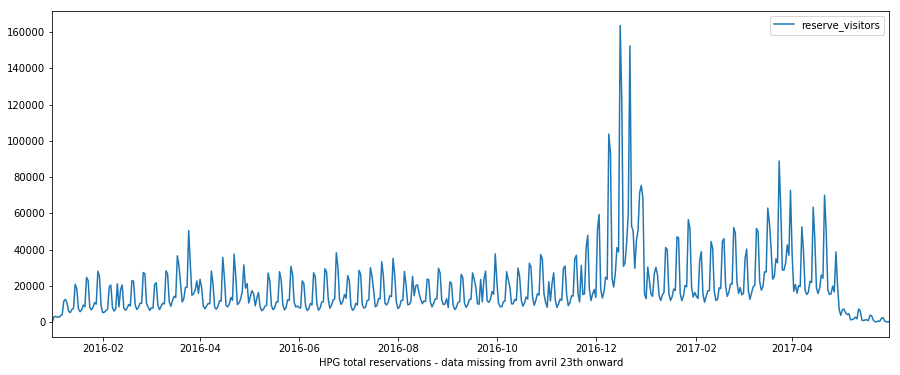

In [13]:
# Compare Reservation data to Visitor data
#Visitor each day
data_load['hpg_reserve']['visit_date']=data_load['hpg_reserve']['visit_datetime'].apply(lambda x: x.date())
data_load['hpg_reserve']['reserve_date']=data_load['hpg_reserve']['reserve_datetime'].apply(lambda x: x.date())
hpgR1 = data_load['hpg_reserve'].groupby(['visit_date'], as_index=False).agg({'reserve_visitors': np.sum})
hpgR1=hpgR1.set_index('visit_date')

ax = hpgR1.plot(figsize=(15, 6))
ax.set_xlabel('HPG total reservations - data missing from avril 23th onward')

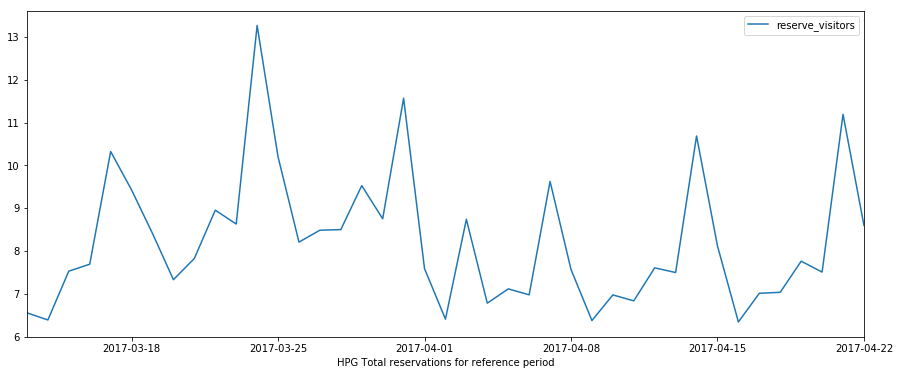

In [17]:
threshold_date = datetime.date(2017, 3, 13)
evaluation_end_date = datetime.date(2017,4, 22)

# Compare Reservation data to Visitor data
#Visitor each day
data_load['hpg_reserve']['visit_date']=data_load['hpg_reserve']['visit_datetime'].apply(lambda x: x.date())
data_load['hpg_reserve']['reserve_date']=data_load['hpg_reserve']['reserve_datetime'].apply(lambda x: x.date())
hpgR1 = data_load['hpg_reserve'].groupby(['visit_date', 'hpg_store_id' ], as_index=False).agg({'reserve_visitors': np.sum})
hpgR1 = hpgR1.groupby(['visit_date'], as_index=False).agg({'reserve_visitors': np.mean})
hpgR1 = hpgR1[(hpgR1[('visit_date')] >= threshold_date) & (hpgR1['visit_date'] <= evaluation_end_date)]
hpgR1=hpgR1.set_index('visit_date')

ax = hpgR1.plot(figsize=(15, 6))
ax.set_xlabel('HPG Total reservations for reference period')

### Reservation data per restaurant (for the hpg restaurant with the most reservations)

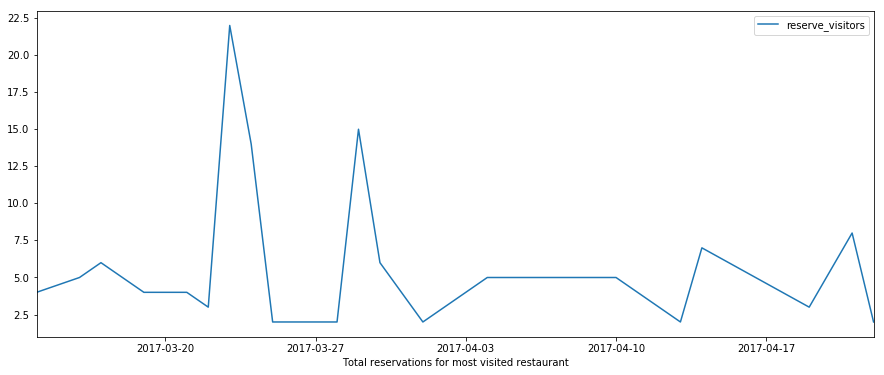

In [15]:
hpgRR1=data_load['hpg_reserve'].groupby(['hpg_store_id', 'visit_date'], as_index=False).agg({'reserve_visitors': np.sum})

hpgRR1 = hpgRR1[hpgRR1['hpg_store_id'] == 'hpg_b9cc0c52116943be']
hpgRR1 = hpgRR1[(hpgRR1[('visit_date')] >= threshold_date) & (hpgRR1['visit_date'] <= evaluation_end_date)]
hpgRR1=hpgRR1.set_index('visit_date')

ax = hpgRR1.plot(figsize=(15, 6))
ax.set_xlabel('Total reservations for most visited restaurant')

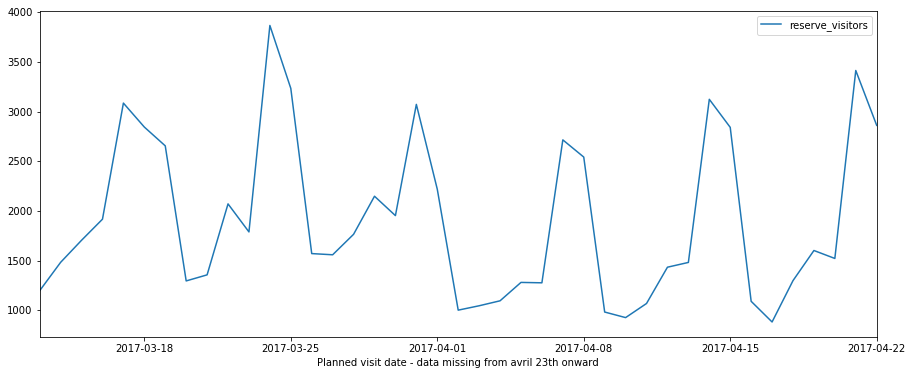

In [10]:
threshold_date = datetime.date(2017, 3, 13)
evaluation_end_date = datetime.date(2017,4, 22)

# Compare Reservation data to Visitor data
#Visitor each day
data_load['air_reserve']['visit_date']=data_load['air_reserve']['visit_datetime'].apply(lambda x: x.date())
data_load['air_reserve']['reserve_date']=data_load['air_reserve']['reserve_datetime'].apply(lambda x: x.date())
airR1 = data_load['air_reserve'].groupby(['visit_date', 'air_store_id' ], as_index=False).agg({'reserve_visitors': np.sum})
airR1 = airR1.groupby(['visit_date'], as_index=False).agg({'reserve_visitors': np.sum})
airR1 = airR1[(airR1[('visit_date')] >= threshold_date) & (airR1['visit_date'] <= evaluation_end_date)]
airR1 = airR1.set_index('visit_date')

ax = airR1.plot(figsize=(15, 6))
ax.set_xlabel('Planned visit date - data missing from avril 23th onward')

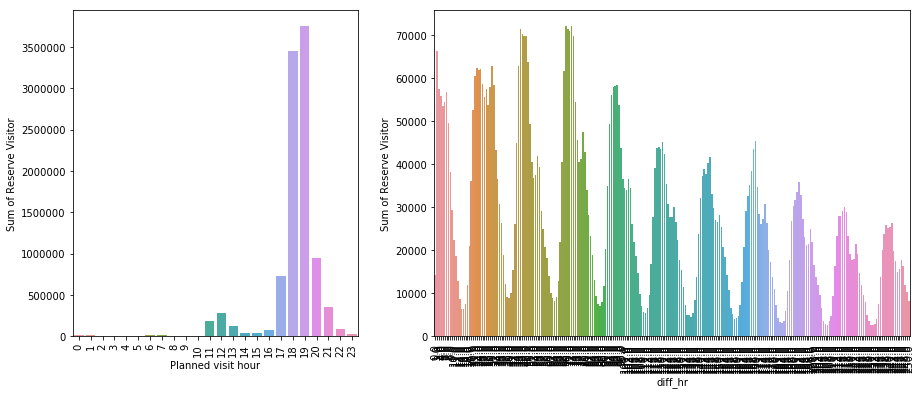

In [90]:
data_load['hpg_reserve']['visit_hr']=data_load['hpg_reserve']['visit_datetime'].apply(lambda x: x.time().hour)
data_load['hpg_reserve']['reserve_hr']=data_load['hpg_reserve']['reserve_datetime'].apply(lambda x: x.time().hour)
data_load['hpg_reserve']['diff_hr']=(data_load['hpg_reserve']['visit_datetime']-data_load['hpg_reserve']['reserve_datetime']).apply(lambda x : x.total_seconds()/3600)
hpgR2 = data_load['hpg_reserve'].groupby(['visit_hr'], as_index=False).agg({'reserve_visitors': np.sum})
hpgR3 = data_load['hpg_reserve'].groupby(['diff_hr'], as_index=False).agg({'reserve_visitors': np.sum})
#plot
fig = plt.figure(figsize=(15, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 2.5]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
sns.barplot(x="visit_hr",y="reserve_visitors",data=hpgR2,ax=ax0)
sns.barplot(x="diff_hr",y="reserve_visitors",data=hpgR3[(hpgR3['diff_hr'] <= 250)],ax=ax1)
ax0.set_xlabel('Planned visit hour')
ax0.set_ylabel('Sum of Reserve Visitor')
ax1.set_ylabel('Sum of Reserve Visitor')
for ax in [ax0,ax1]:
    for label in ax.get_xticklabels():
        label.set_rotation(90) 

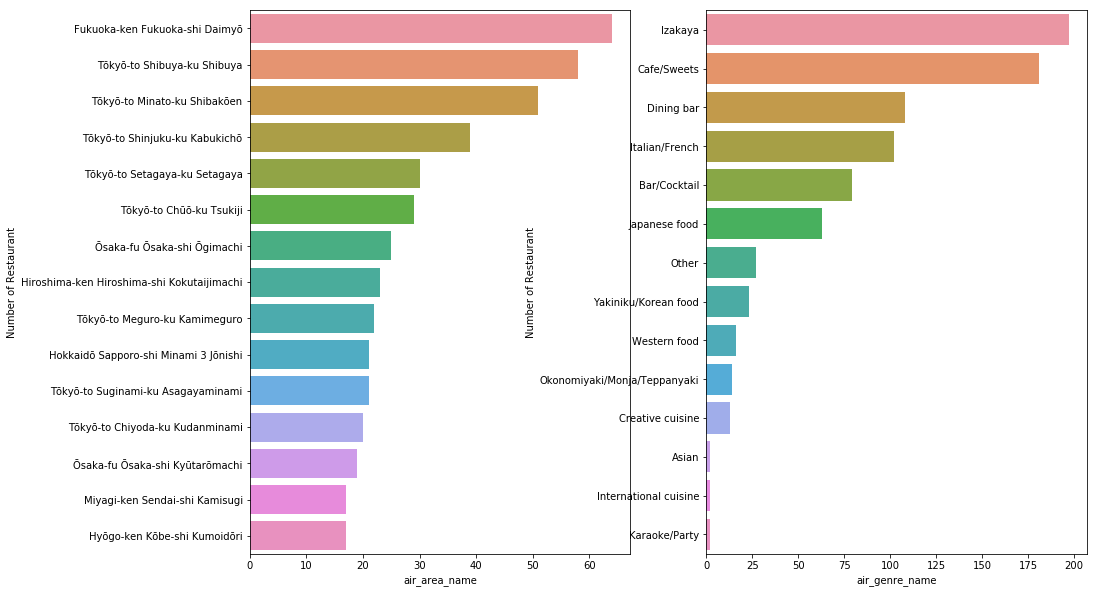

In [23]:
# Number of restaurent in area: Air Data
airS1=data_load['air_store']['air_area_name'].value_counts().reset_index().sort_index()
airS2=data_load['air_store']['air_genre_name'].value_counts().reset_index().sort_index()
fig,ax = plt.subplots(1,2)
sns.barplot(y='index' ,x='air_area_name',data=airS1.iloc[:15],ax=ax[0])
sns.barplot(y='index' ,x='air_genre_name',data=airS2.iloc[:15],ax=ax[1])
fig.set_size_inches(15,10, forward=True)
ax[0].set_ylabel('Number of Restaurant')
ax[1].set_ylabel('Number of Restaurant')

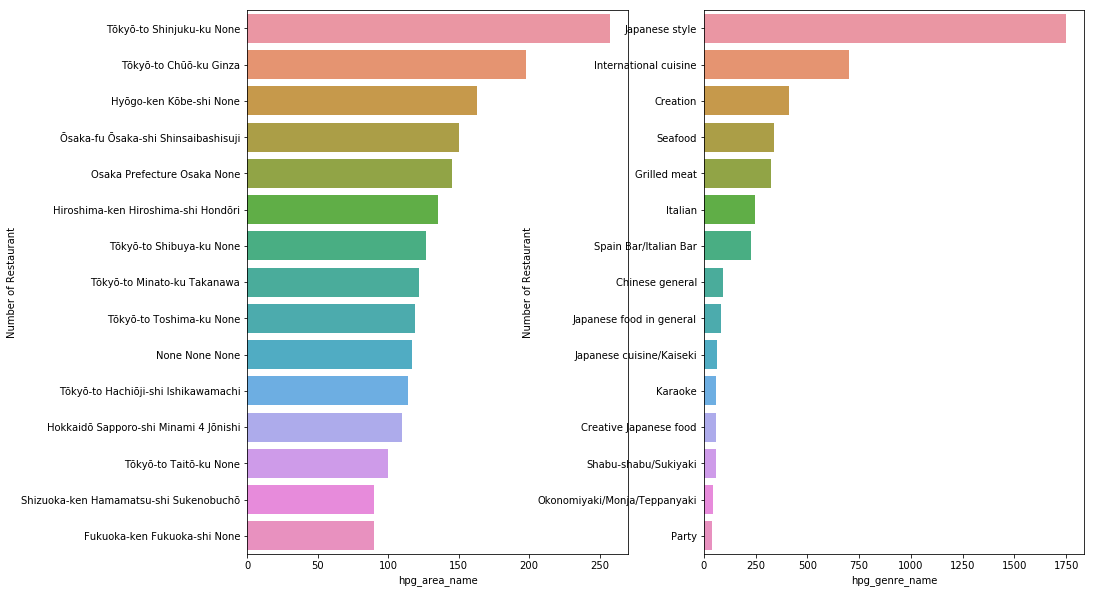

In [19]:
# Number of restaurent in area: HPG store
hpgS1=data_load['hpg_store']['hpg_area_name'].value_counts().reset_index().sort_index()
hpgS2=data_load['hpg_store']['hpg_genre_name'].value_counts().reset_index().sort_index()
fig,ax = plt.subplots(1,2)
sns.barplot(y='index' ,x='hpg_area_name',data=hpgS1.iloc[:15],ax=ax[0])
sns.barplot(y='index' ,x='hpg_genre_name',data=hpgS2.iloc[:15],ax=ax[1])
fig.set_size_inches(15,10, forward=True)
ax[0].set_ylabel('Number of Restaurant')
ax[1].set_ylabel('Number of Restaurant')

In [21]:
hpgS2

,index,hpg_genre_name
0,Japanese style,1750
1,International cuisine,700
2,Creation,410
3,Seafood,339
4,Grilled meat,325
5,Italian,249
6,Spain Bar/Italian Bar,229
7,Chinese general,91
8,Japanese food in general,85
9,Japanese cuisine/Kaiseki,64


In [24]:
airS2

,index,air_genre_name
0,Izakaya,197
1,Cafe/Sweets,181
2,Dining bar,108
3,Italian/French,102
4,Bar/Cocktail,79
5,Japanese food,63
6,Other,27
7,Yakiniku/Korean food,23
8,Western food,16
9,Okonomiyaki/Monja/Teppanyaki,14


In [25]:
airS1

,index,air_area_name
0,Fukuoka-ken Fukuoka-shi Daimyō,64
1,Tōkyō-to Shibuya-ku Shibuya,58
2,Tōkyō-to Minato-ku Shibakōen,51
3,Tōkyō-to Shinjuku-ku Kabukichō,39
4,Tōkyō-to Setagaya-ku Setagaya,30
5,Tōkyō-to Chūō-ku Tsukiji,29
6,Ōsaka-fu Ōsaka-shi Ōgimachi,25
7,Hiroshima-ken Hiroshima-shi Kokutaijimachi,23
8,Tōkyō-to Meguro-ku Kamimeguro,22
9,Hokkaidō Sapporo-shi Minami 3 Jōnishi,21
